In [ ]:
#모듈 로드
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential  #모델 만들기
from tensorflow.keras.layers import Dense, Dropout, Flatten  #레이어 쌓기
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy, categorical_crossentropy, binary_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model

데이터 로드

In [ ]:
#필기체 인식 데이터
(x_data, y_data),(tt_x, tt_y) = keras.datasets.mnist.load_data()

In [ ]:
#차원 확인
x_data.shape, y_data.shape

((60000, 28, 28), (60000,))

In [ ]:
y_data


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
#실제값 종류 확인
np.unique(y_data, return_counts= True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [ ]:
for i in range(10):
    plt.imshow(x_data[i], cmap = 'gray_r')
    plt.show()

In [ ]:
#스케일링 방법 생각
x_data.max(), x_data.min()

(255, 0)

In [ ]:
#스케일링, 벡터화
x_data = x_data / 255.0
x_data = x_data.reshape(-1,28*28)

In [ ]:
#모델 생성
m = Sequential()
m.add(Flatten(input_shape = (28,28)))
m.add(Dense(100, activation = 'relu')) #입력층 활성화: relu, 입력 데이터 피쳐 수 입력
m.add(Dropout(0.3)) #과적합 예방 드롭아웃
m.add(Dense(10, activation = 'softmax')) #출력층 다중 클래스 분류이므로 소프트맥스
m.summary()

In [ ]:
m.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
t_x, v_x, t_y, v_y = train_test_split(x_data, y_data, random_state = 42)

In [ ]:
hy = m.fit(t_x, t_y, epochs = 10, validation_data = [v_x, v_y])

In [ ]:
m.evaluate(v_x, v_y)

469/469 [==============================] - 1s 1ms/step - loss: 0.1101 - accuracy: 0.9747


[0.11011165380477905, 0.9746666550636292]

In [ ]:
hy.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
hy.history

In [ ]:
plt.plot(hy.history['accuracy'])
plt.plot(hy.history['val_accuracy'])
plt.legend(['tr_acc', 'val_acc'])
plt.show()
plt.plot(hy.history['loss'])
plt.plot(hy.history['val_loss'])
plt.legend(['tr_loss','val_loss'])
plt.show()

In [ ]:
#모듈 로드
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential  #모델 만들기
from tensorflow.keras.layers import Dense, Dropout, Flatten  #레이어 쌓기
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.losses import sparse_categorical_crossentropy, categorical_crossentropy, binary_crossentropy
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import load_model

In [ ]:
#필기체 인식 데이터
(x_data, y_data),(tt_x, tt_y) = keras.datasets.mnist.load_data()

In [ ]:
#차원 확인
x_data.shape, y_data.shape

((60000, 28, 28), (60000,))

In [ ]:
x_data = x_data/255.0

In [ ]:
#실제값 종류 확인
np.unique(y_data, return_counts= True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [ ]:
#모델 생성
m = Sequential()
m.add(Flatten(input_shape = (28,28)))
m.add(Dense(100, activation = 'relu')) #입력층 활성화: relu, 입력 데이터 피쳐 수 입력
m.add(Dropout(0.3)) #과적합 예방 드롭아웃
m.add(Dense(10, activation = 'softmax')) #출력층 다중 클래스 분류이므로 소프트맥스
m.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_13 (Dense)            (None, 100)               78500     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_14 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
m.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [ ]:
m.fit(x_data, y_data, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3478 - accuracy: 0.8980
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1782 - accuracy: 0.9472
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1377 - accuracy: 0.9580
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1190 - accuracy: 0.9633
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1073 - accuracy: 0.9668


In [ ]:
y = np.unique(y_data)
y

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
ans = m.predict(tt_x[:10]) > 0.5
y[ans[0]][0]


7

함수화해서 정답 뽑아보기

In [ ]:
def answer(xdata):
    y = np.unique(y_data)    
    ans = m.predict(xdata) > 0.5
    for idx, fig in enumerate(xdata):
        print(f"['숫자{y[ans[idx]][0]}']")
        plt.imshow(fig, cmap='gray_r')
        plt.show()

In [ ]:
answer(tt_x[:10])

타이타닉 data를 이용해 이진 분류기를 만들고 시각화하자

In [ ]:
import seaborn as sns
import numpy as np
data = sns.load_dataset('titanic')
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [ ]:
#결측치 확인
data.isnull().sum()/len(data)

survived       0.000000
pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.002245
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

In [ ]:
#데이터 분류
X = data[['pclass','sex', 'age'	,'sibsp','parch','fare','embarked',	'class','who','adult_male','deck','embark_town','alive','alone']]
y = data.survived

In [ ]:
#X.embarked.mode()[0]

'S'

결측치 제거

In [ ]:
X.embarked.fillna(X.embarked.mode()[0], inplace=True)
X.isnull().sum()/len(X)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.000000
class          0.000000
who            0.000000
adult_male     0.000000
deck           0.772166
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

In [ ]:
X = X.drop(columns=['deck'])
X.isnull().sum()/len(X)

pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.000000
class          0.000000
who            0.000000
adult_male     0.000000
embark_town    0.002245
alive          0.000000
alone          0.000000
dtype: float64

In [ ]:
X.embark_town.fillna(X.embark_town.mode()[0], inplace=True)
X.isnull().sum()/len(X)

pclass         0.000000
sex            0.000000
age            0.198653
sibsp          0.000000
parch          0.000000
fare           0.000000
embarked       0.000000
class          0.000000
who            0.000000
adult_male     0.000000
embark_town    0.000000
alive          0.000000
alone          0.000000
dtype: float64

In [ ]:
np.unique(X['embark_town'])

array(['Cherbourg', 'Queenstown', 'Southampton'], dtype=object)

In [ ]:
#X = X.drop(columns=['embark_town','age','embarked'])

{'boxes': [<matplotlib.lines.Line2D at 0x7f1c33535090>],
 'caps': [<matplotlib.lines.Line2D at 0x7f1c33167a50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f1c33c43390>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f1c33c435d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f1c3222b410>,
  <matplotlib.lines.Line2D at 0x7f1c33167510>]}

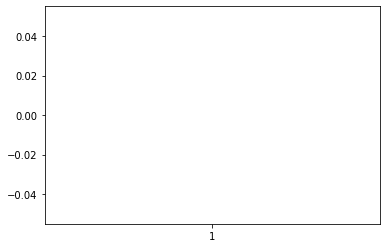

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   pclass       891 non-null    int64   
 1   sex          891 non-null    object  
 2   age          714 non-null    float64 
 3   sibsp        891 non-null    int64   
 4   parch        891 non-null    int64   
 5   fare         891 non-null    float64 
 6   embarked     891 non-null    object  
 7   class        891 non-null    category
 8   who          891 non-null    object  
 9   adult_male   891 non-null    bool    
 10  embark_town  889 non-null    object  
 11  alive        891 non-null    object  
 12  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(3), object(5)
memory usage: 72.5+ KB


In [ ]:
X = X.drop(columns=['sex','class','who','adult_male','alive','alone'])

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  891 non-null    int64  
 1   sibsp   891 non-null    int64  
 2   parch   891 non-null    int64  
 3   fare    891 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 28.0 KB


In [ ]:
X = np.array(X)

In [ ]:
X.shape, y.shape

((891, 4), (891,))

In [ ]:
t_x, tt_x, t_y, tt_y = train_test_split(X,y, random_state=42)

In [ ]:
t_x.shape, t_y.shape

((668, 4), (668,))

In [ ]:
t_x

array([[  1.    ,   0.    ,   0.    ,  30.5   ],
       [  3.    ,   0.    ,   0.    ,   7.05  ],
       [  2.    ,   0.    ,   2.    ,  14.5   ],
       ...,
       [  3.    ,   2.    ,   0.    ,  14.1083],
       [  1.    ,   1.    ,   2.    , 120.    ],
       [  1.    ,   0.    ,   1.    ,  77.2875]])

In [ ]:
m = Sequential()
m.add(Dense(100, activation='relu', input_shape=(4,)))
m.add(Dense(1, activation='sigmoid'))
m.summary()
m.compile(optimizer='adam',loss = binary_crossentropy, metrics = 'accuracy')

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_37 (Dense)            (None, 100)               500       
                                                                 
 dense_38 (Dense)            (None, 1)                 101       
                                                                 
Total params: 601
Trainable params: 601
Non-trainable params: 0
_________________________________________________________________


In [ ]:
m.fit(t_x, t_y,epochs = 10)

Epoch 1/10
21/21 [==============================] - 0s 2ms/step - loss: 0.6106 - accuracy: 0.6737
Epoch 2/10
21/21 [==============================] - 0s 2ms/step - loss: 0.6092 - accuracy: 0.6647
Epoch 3/10
21/21 [==============================] - 0s 1ms/step - loss: 0.6078 - accuracy: 0.6632
Epoch 4/10
21/21 [==============================] - 0s 1ms/step - loss: 0.6060 - accuracy: 0.6677
Epoch 5/10
21/21 [==============================] - 0s 1ms/step - loss: 0.6094 - accuracy: 0.6722
Epoch 6/10
21/21 [==============================] - 0s 1ms/step - loss: 0.6020 - accuracy: 0.6781
Epoch 7/10
21/21 [==============================] - 0s 1ms/step - loss: 0.5969 - accuracy: 0.6751
Epoch 8/10
21/21 [==============================] - 0s 1ms/step - loss: 0.6008 - accuracy: 0.6871
Epoch 9/10
21/21 [==============================] - 0s 1ms/step - loss: 0.6036 - accuracy: 0.6647
Epoch 10/10
21/21 [==============================] - 0s 1ms/step - loss: 0.6003 - accuracy: 0.6871
